# In this notebook, I generated the panels for Figure 7 of the report.

In [36]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad

import matplotlib.pyplot as plt
from PIL import Image
from colormaps.utils import show_cmaps_collection

In [17]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(10, 7))
sc.settings.verbosity = 3

-----
anndata     0.10.8
scanpy      1.10.1
-----
PIL                         10.2.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
astunparse                  1.6.3
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
bottleneck                  1.3.7
brotli                      1.0.9
certifi                     2024.08.30
cffi                        1.16.0
charset_normalizer          2.0.4
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.2.1
cycler                      0.10.0
cython_runtime              NA
dask                        2024.7.0
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
executing                   0.8.3
fastjsonschema              NA
fqdn                        NA
h5py                        3.9.0
id

#### PANEL A
**Note:** I am importing the dataset that I modified and saved in the notebool `fixing_metadata_of_training_dataset.ipynb`.

In [3]:
velm_braun_wang = sc.read_h5ad('/hpc/hers_basak/rnaseq_data/Silettilab/icoratella/final_useful_datasets/velm_braun_wang.h5ad')

In [5]:
palette_broad_annotations = [ "#298837", "#e313ee", "#809776", "#ae4acd", "#daa218", "#f6248f","#0064e1","#94abe1", "#7d4400"]

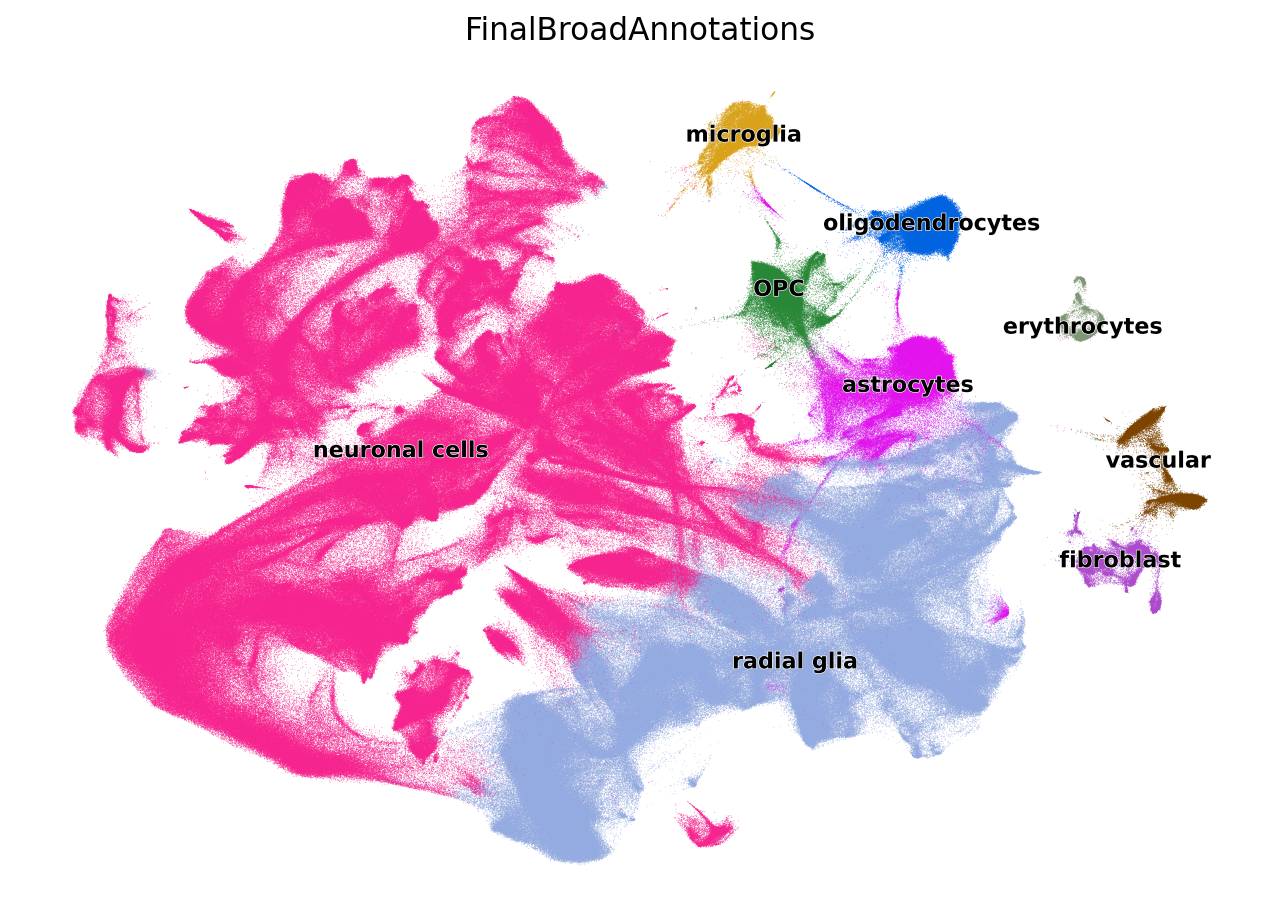

In [23]:
fig = sc.pl.embedding(
    velm_braun_wang,
    basis='UMAP',
    color='FinalBroadAnnotations',
    palette=palette_broad_annotations,
    size=0.5,
    alpha=0.8,
    legend_loc='on data',
    legend_fontsize=10,
    legend_fontoutline=0.6,
    frameon=False,
    show=False,
    return_fig=True
)

# uncomment this to save high quality figure
#plt.savefig('fig_7_panel_a.png', dpi = 600)

#### PANEL B

In [8]:
adata = sc.read_h5ad('/hpc/hers_basak/rnaseq_data/Silettilab/icoratella/final_useful_datasets/noAdolescence_nocc_noclusters_ThirdManualAnnotations_Interneurons.h5ad')

In [10]:
adata = adata[adata.obs['ThirdManualAnnotations'] != 'Subcortical nIPCs']

In [11]:
palette_manual_annotations = ["#0064e1", "#298837", "#f6248f",  "#e313ee", "#ae4acd", "#94abe1", "#daa218"]

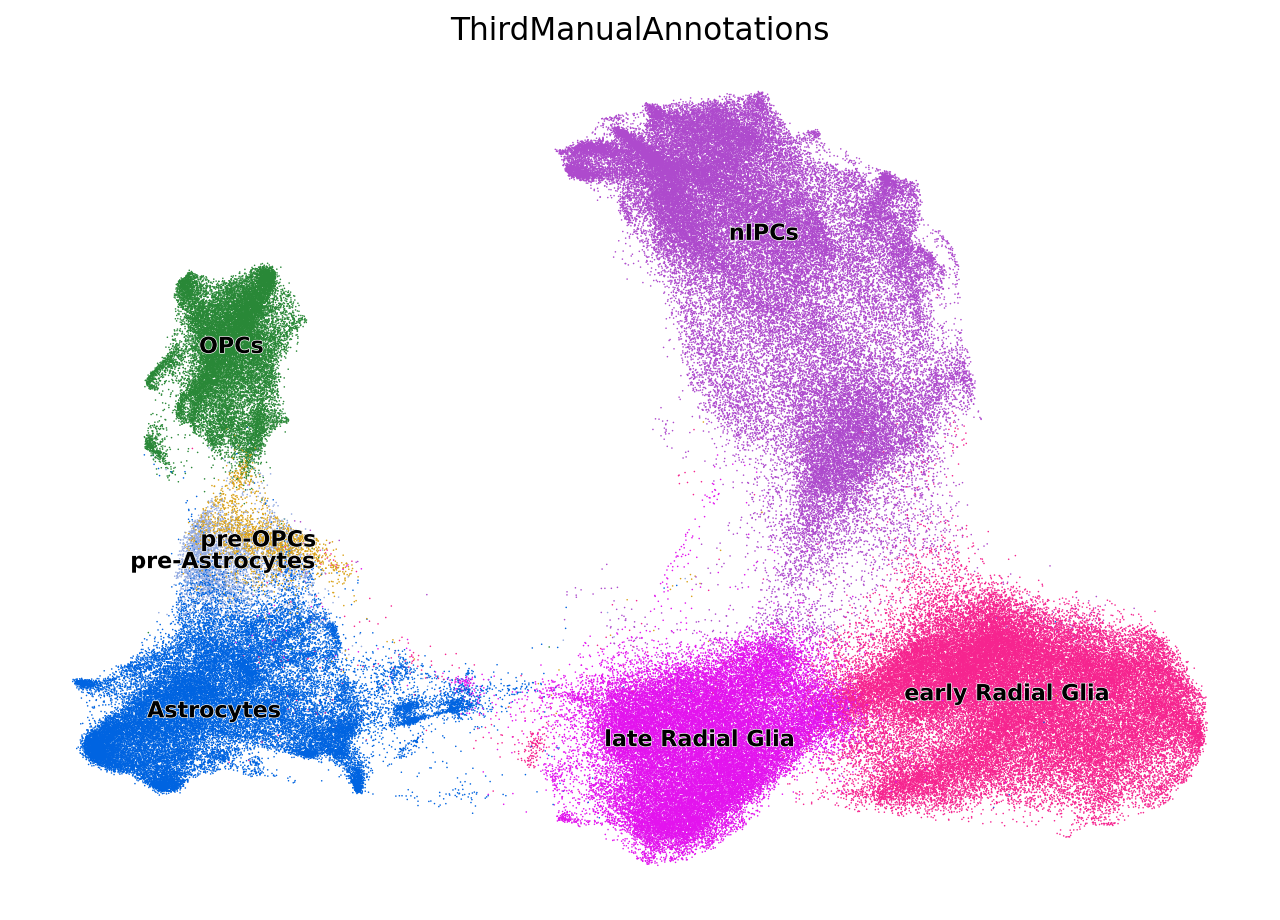

In [22]:
ax = sc.pl.embedding(
    adata,
    basis='UMAP',
    color='ThirdManualAnnotations',
    palette=palette_manual_annotations,
    size=2,
    #alpha=0.8,
    legend_loc='on data',
    legend_fontsize=10,
    legend_fontoutline=0.6,
    frameon=False,
    show=False,
    return_fig=True
)
#plt.savefig('fig_7_panel_b.png', dpi = 600)

#### PANEL C

In [25]:
palette_clusters = [ "#298837", "#e313ee", "#809776", "#ae4acd", "#daa218", "#f6248f","#0064e1","#94abe1", "#7d4400", "#0cc0aa", "#b75970", "#7fdc64", "#2c647e", "#b1bf81", "#c5089e"]

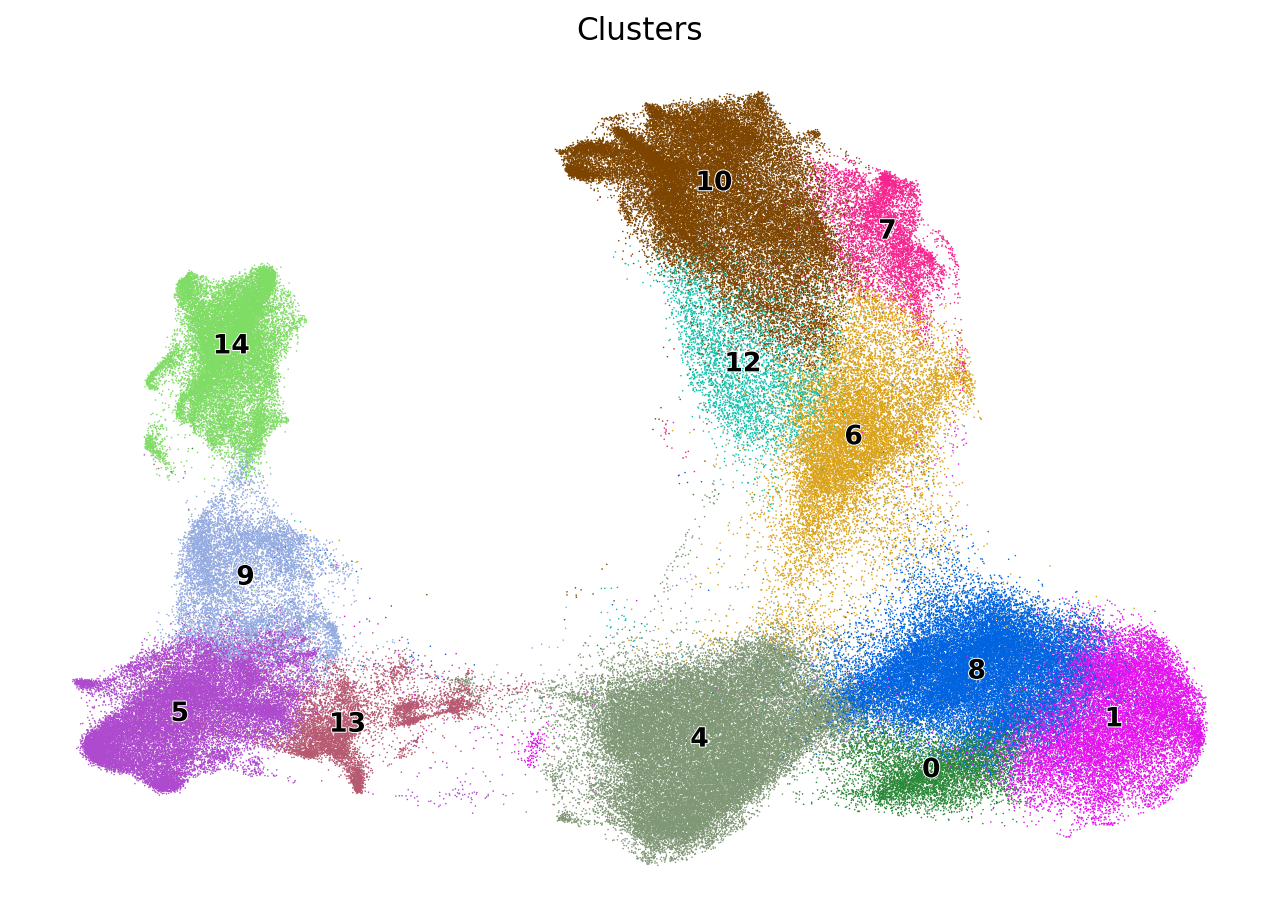

In [30]:
fig = sc.pl.embedding(
    adata,
    basis='UMAP',
    color='Clusters',
    palette=palette_clusters,  
    size=2,
    legend_loc='on data',
    legend_fontsize=12,
    legend_fontoutline=0.9,
    frameon=False,
    show=False,
    return_fig=True
)
#plt.savefig('fig_7_panel_c.png', dpi = 600)

#### PANEL D

In [ ]:
developmental_stage_palette = ["#0cc0aa", "#b75970", "#7fdc64", "#2c647e", "#b1bf81", "#c5089e", "#8aafcf", "#513886", "#f4bb8f", "#b94414", "#9a82e0", "#1c5f1e", "#ee80fe", "#2cf52b", "#6118df", "#cace01", "#ea1349", "#f3c5fa", "#4b481f", "#fbbd13", "#208eb7", "#bce333", "#bc5857", "#2af385", "#eb1241", "#90d796", "#d148d3", "#26496d", "#f8cca6", "#7f73ed", "#6c8c60", "#e9c9fa", "#621da6", "#4bd6fd", "#1b511d", "#e1c637", "#ae896e", "#15974d", "#d6790b", "#604020", "#2af385", "#4bd6fd", "#d6790b", "#6c8c60", "#58b5e1"]

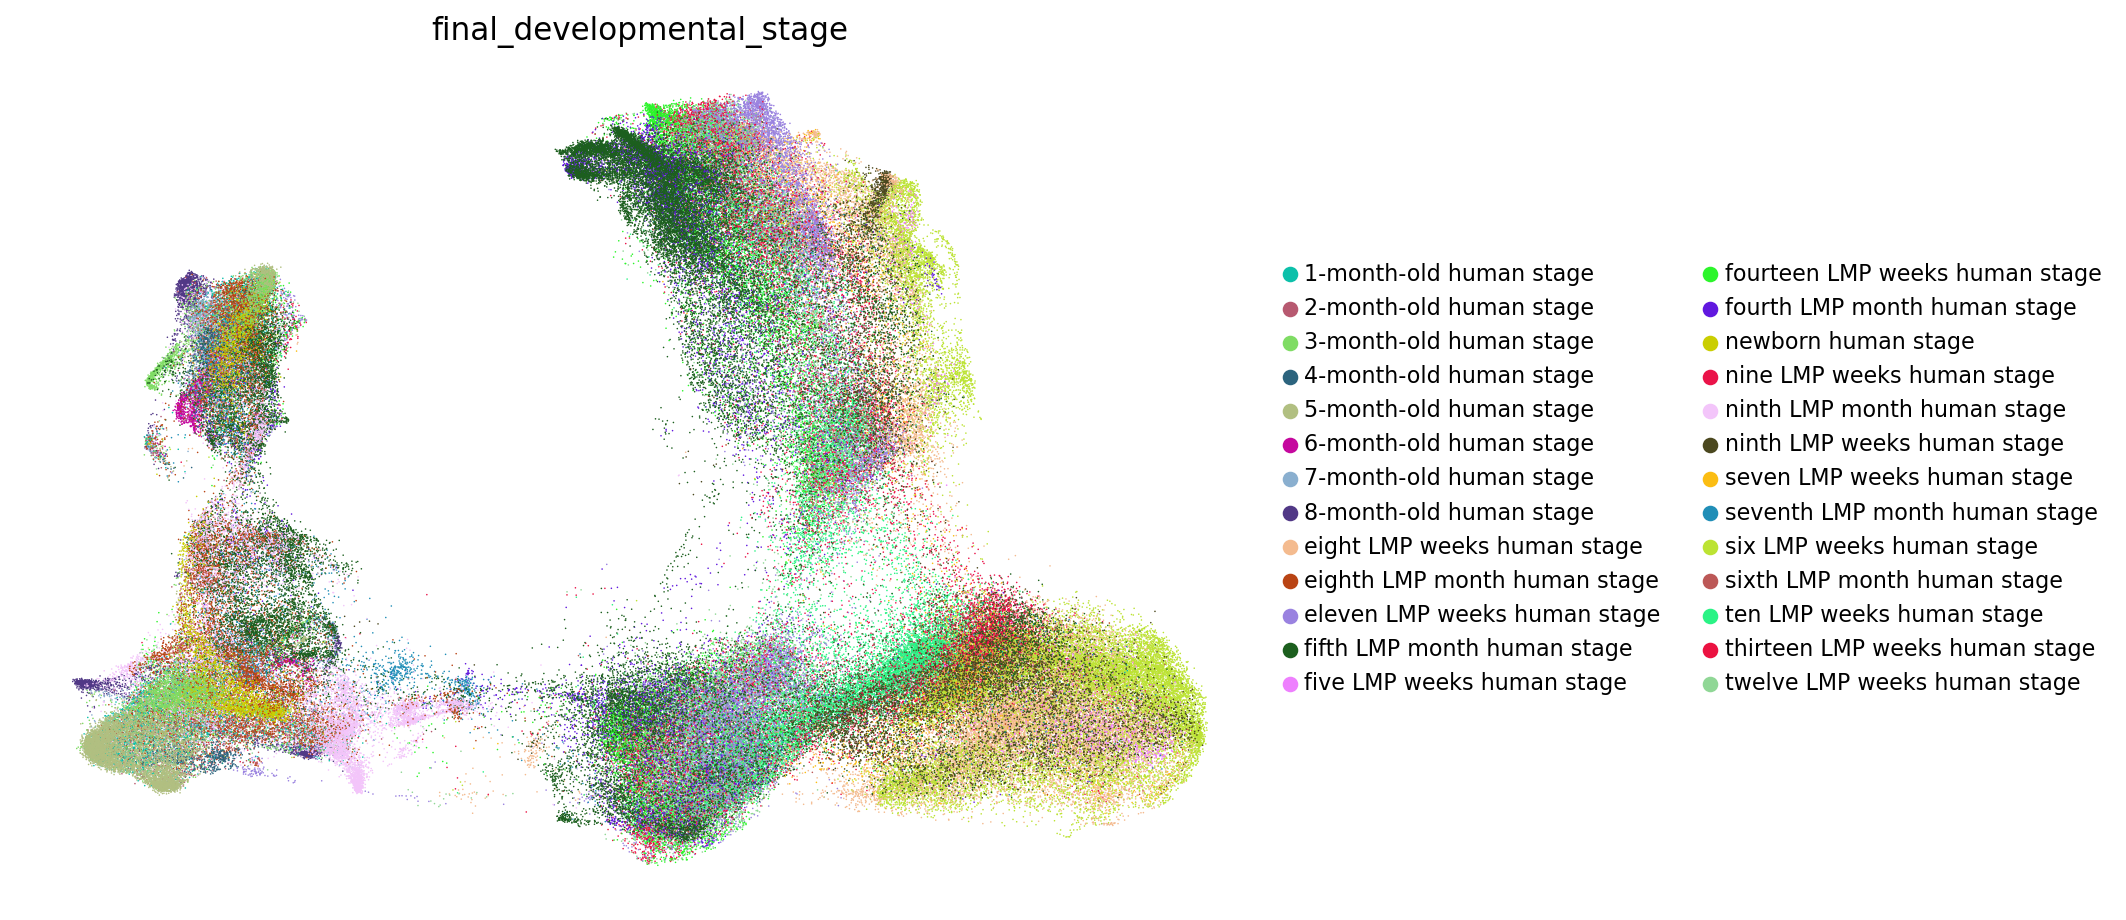

In [37]:
ax = sc.pl.embedding(
    adata,
    basis='UMAP',
    color='final_developmental_stage',
    palette=developmental_stage_palette,
    size=2,
    legend_fontsize=10,
    legend_fontoutline=0.6,
    frameon=False,
    show=False, 
    return_fig=True
)
#plt.savefig('fig_7_panel_d.png', dpi = 600)

#### PANEL E-F: Code for this panel provided in notebook 'gIPC_reannotation_after_removing_astro.ipynb'

#### PANEL G
**Note:** These genes were selected based on a differential expression analysis among cell classes, conducted in the notebook `DEA_of_cell_classes.ipynb`.

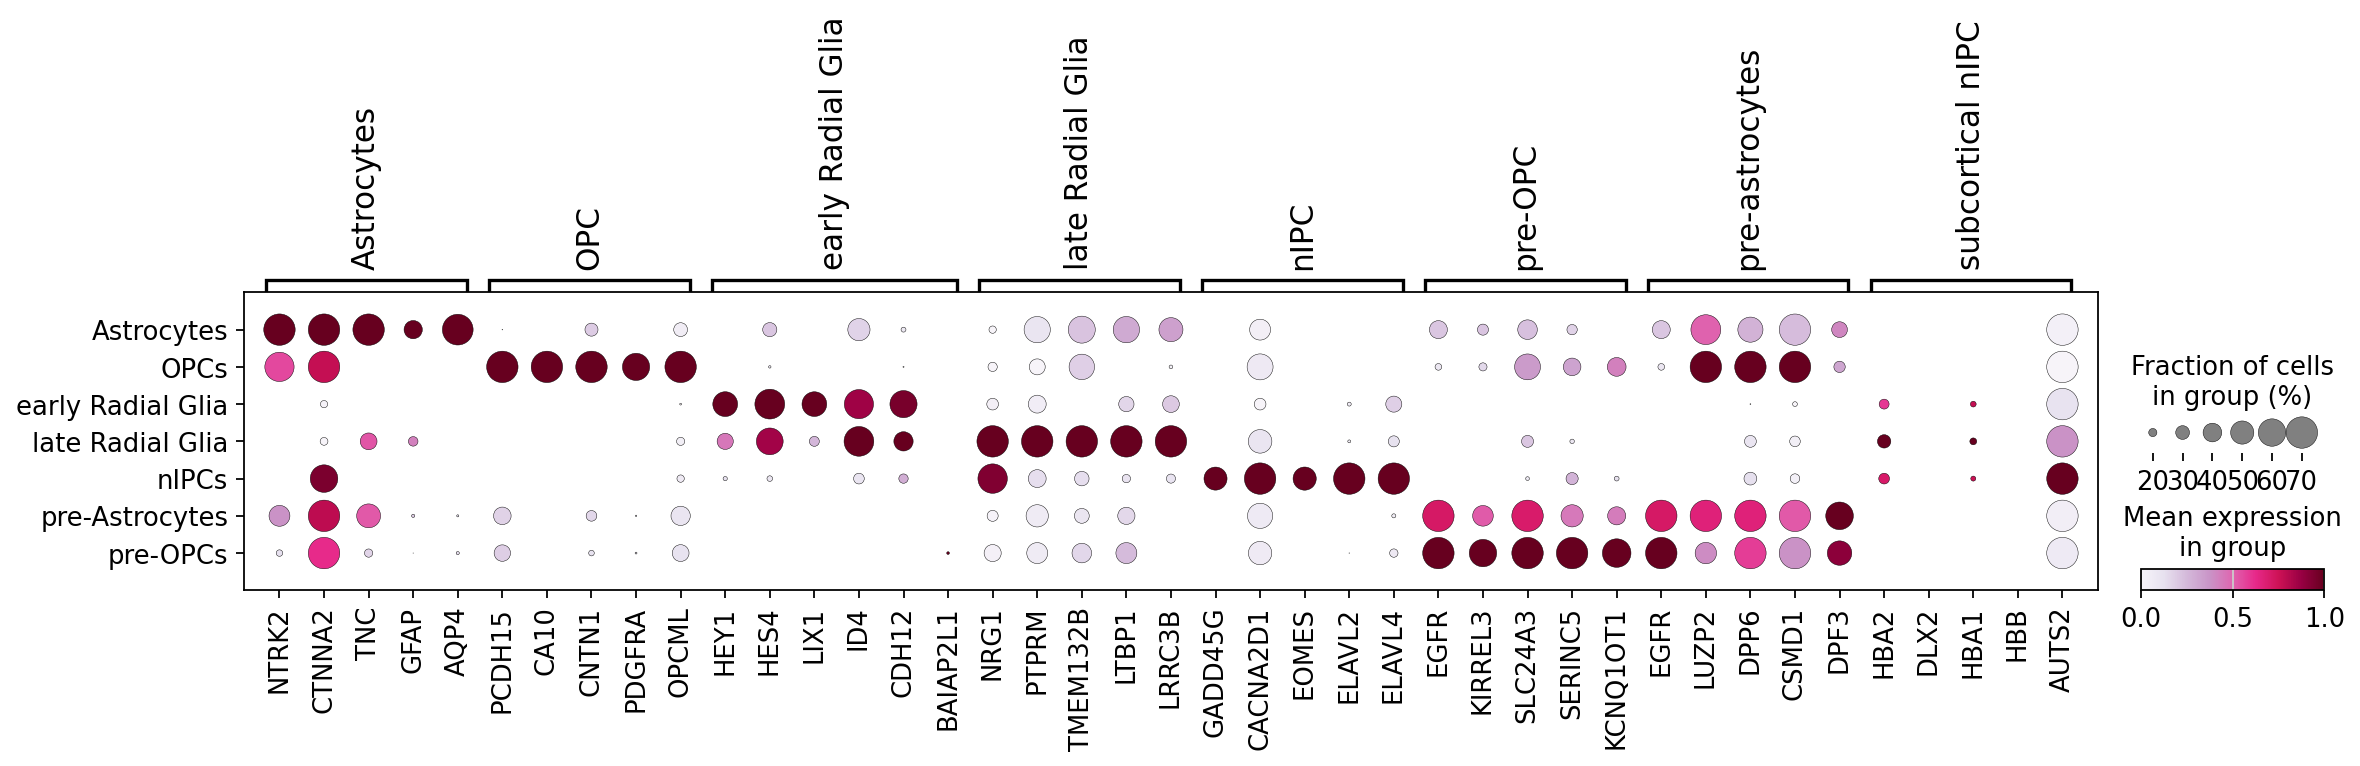

In [38]:
genes = {
    'Astrocytes': ['NTRK2', 'CTNNA2', 'TNC', 'GFAP', 'AQP4'],
    'OPC': ['PCDH15', 'CA10', 'CNTN1', 'PDGFRA', 'OPCML'],
    'early Radial Glia': ['HEY1', 'HES4', 'LIX1', 'ID4', 'CDH12', 'BAIAP2L1'],
    'late Radial Glia': ['NRG1', 'PTPRM', 'TMEM132B', 'LTBP1', 'LRRC3B'],
    'nIPC': ['GADD45G', 'CACNA2D1', 'EOMES', 'ELAVL2', 'ELAVL4'],
    'pre-OPC': ['EGFR', 'KIRREL3', 'SLC24A3', 'SERINC5', 'KCNQ1OT1'],
    'pre-astrocytes': ['EGFR', 'LUZP2', 'DPP6', 'CSMD1', 'DPF3'],
    'subcortical nIPC': ['HBA2', 'DLX2', 'HBA1', 'HBB', 'AUTS2']
}

ax = sc.pl.dotplot(
    adata,
    var_names=genes,            
    groupby='ThirdManualAnnotations',   
    standard_scale='var',  
    use_raw=False,                 
    color_map='PuRd',               
    dot_max=0.7,                    
    dot_min=0.1,                    
    show=False                      
)

#plt.savefig('fig_7_panel_g.png', dpi = 600)
